In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head

<bound method NDFrame.head of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TA

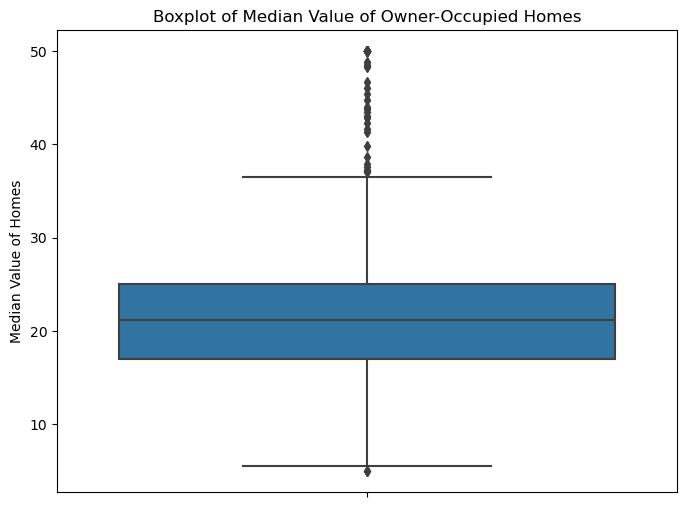

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data = boston_df, y='MEDV')

plt.ylabel('Median Value of Homes')
plt.title('Boxplot of Median Value of Owner-Occupied Homes')

plt.show()

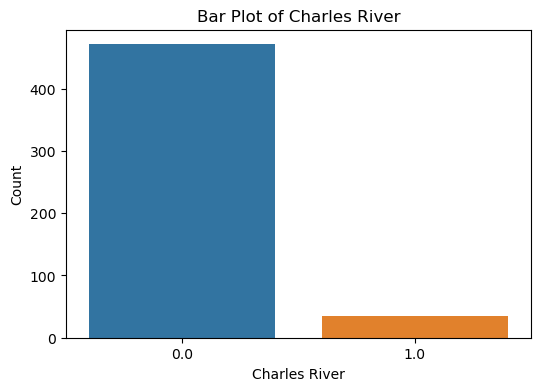

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data = boston_df, x ='CHAS')

plt.xlabel('Charles River')
plt.ylabel('Count')
plt.title('Bar Plot of Charles River')
plt.show()

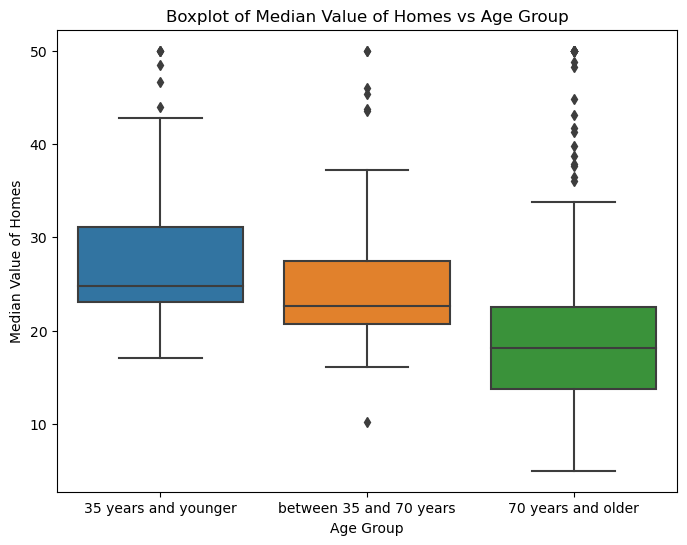

In [10]:
boston_df['AGE.group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')],
                               labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(8, 6))
sns.boxplot(boston_df, x='AGE.group', y='MEDV')

plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes')
plt.title('Boxplot of Median Value of Homes vs Age Group')
plt.show()

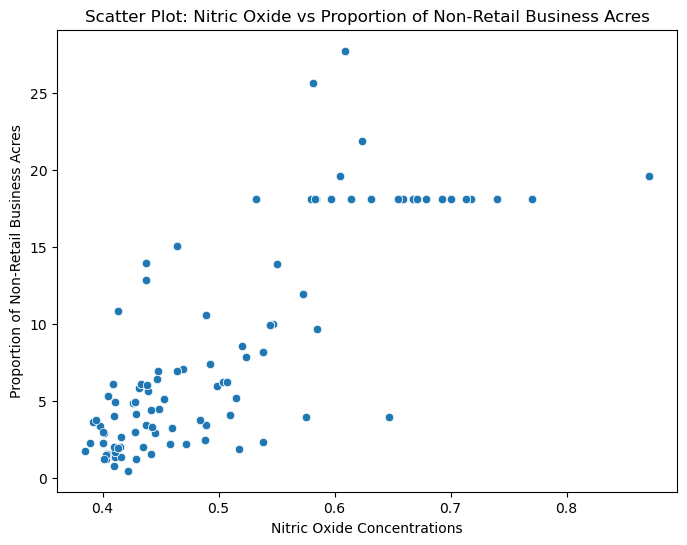

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.title('Scatter Plot: Nitric Oxide vs Proportion of Non-Retail Business Acres')

plt.show()

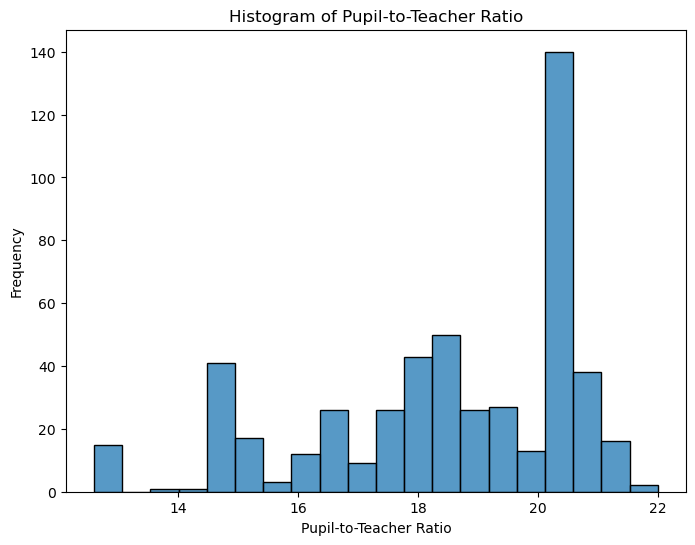

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=boston_df, x='PTRATIO', bins=20)

plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.show()

In [14]:
df = boston_df

group_a = df[df['CHAS'] == 1]['MEDV']
group_b = df[df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
alpha = 0.05

if p_value < alpha:
    print("There is significant difference in median value.")
else:
    print("There is no significant difference in median value.")

There is significant difference in median value.


In [16]:
f_statistic, p_value = stats.f_oneway(*[group['MEDV'] for _, group in df.groupby('AGE')])
alpha = 0.05

if p_value < alpha:
    print("There is significant difference in median value of houses for different age groups.")
else:
    print("There is no significant difference in median value of houses for different age groups.")

There is no significant difference in median value of houses for different age groups.


In [17]:
correlation_coefficient, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
alpha = 0.05

if p_value < alpha:
    print("There is a significant relationship between Nitric Oxide concentration and non-retail business acres.")
else:
    print("There is no significant relationship between Nitric Oxide concentration and non-retail business acres.")

There is a significant relationship between Nitric Oxide concentration and non-retail business acres.


In [18]:
X = df['DIS']
y = df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        19:42:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0